In [2]:
# Data Manipulation
import numpy as np 
import pandas as pd 
# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
# Feature Engineering
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
# Evaluation 
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , f1_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
diabetes_data = pd.read_csv("diabetes.csv")

In [4]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_data.duplicated().sum()

0

In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


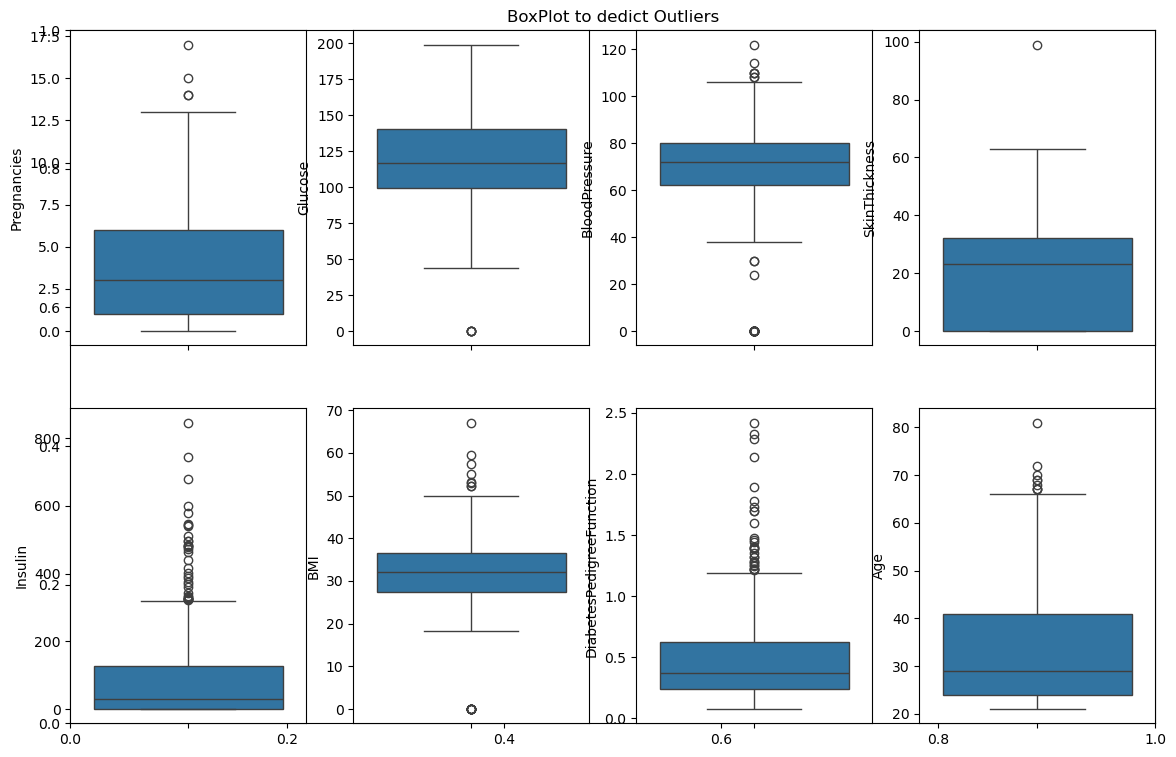

In [11]:
def diabetesboxBlot(df, cols):
    plt.figure(figsize=(14,9))
    plt.title('BoxPlot to dedict Outliers')
    for i, col in zip(range(1,len(cols)), cols):
        plt.subplot(2,4,i)
        sns.boxplot(df[col])
    plt.show()

diabetesboxBlot(diabetes_data, diabetes_data.columns)

In [12]:
def removeOutliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [13]:
diabetes_data = removeOutliers(diabetes_data, diabetes_data.columns)

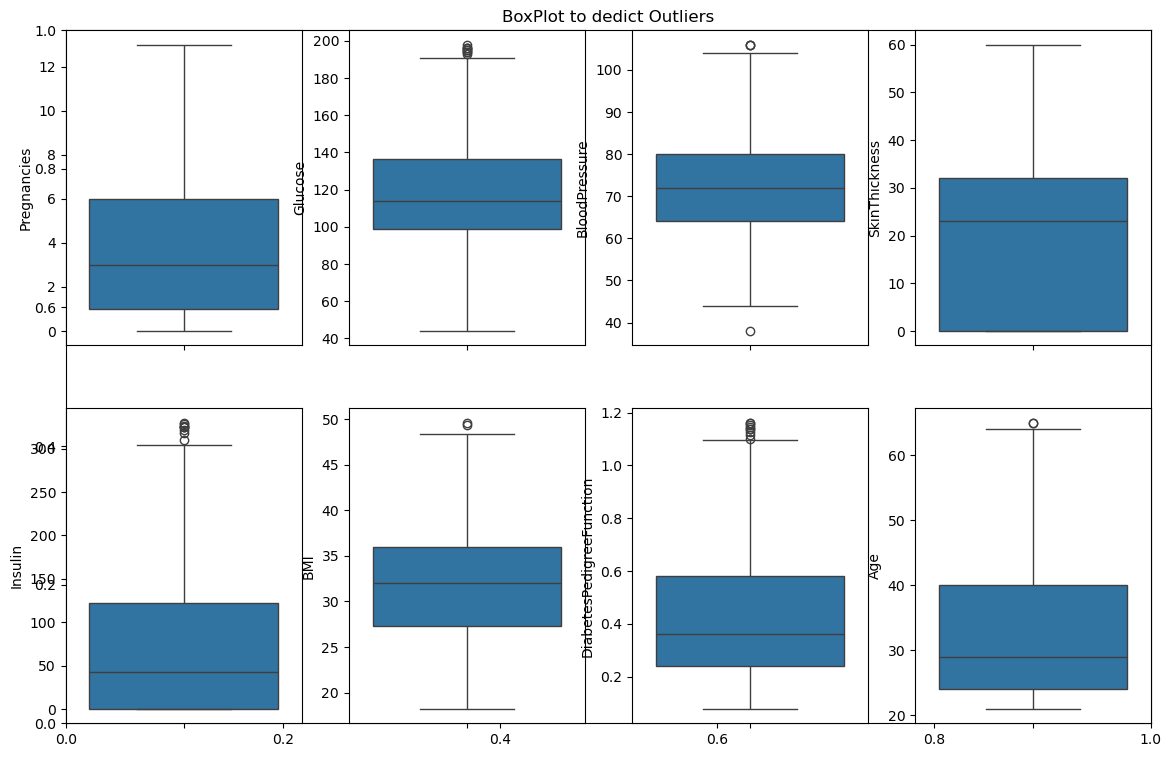

In [14]:
diabetesboxBlot(diabetes_data, diabetes_data.columns)

In [15]:
print(diabetes_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


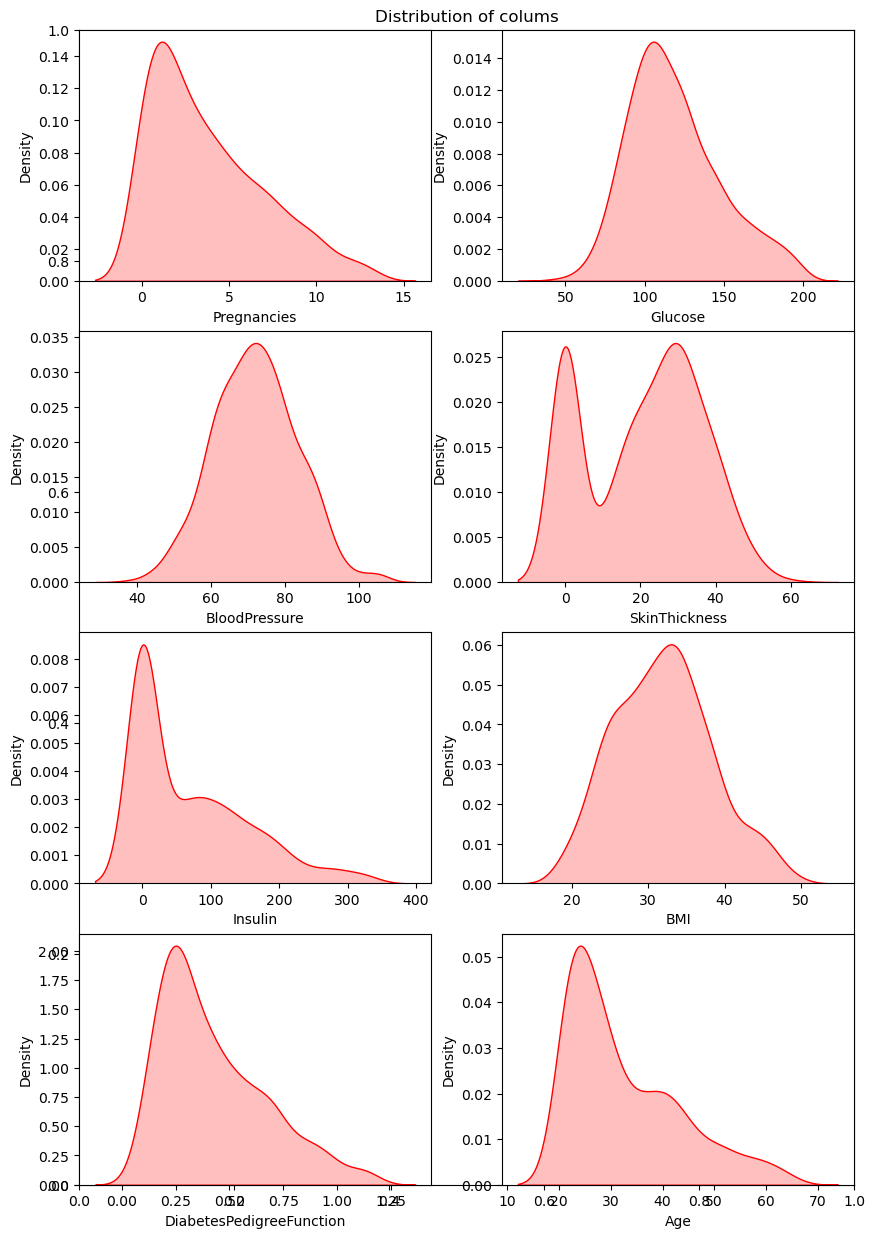

In [16]:
plt.figure(figsize=(10,15))
plt.title('Distribution of colums')
for i, col in zip(range(1,len(diabetes_data.columns)), diabetes_data.columns):
    plt.subplot(4,2,i)
    sns.kdeplot(diabetes_data[col], fill=True, color='red')
plt.show()

<Figure size 1500x1500 with 0 Axes>

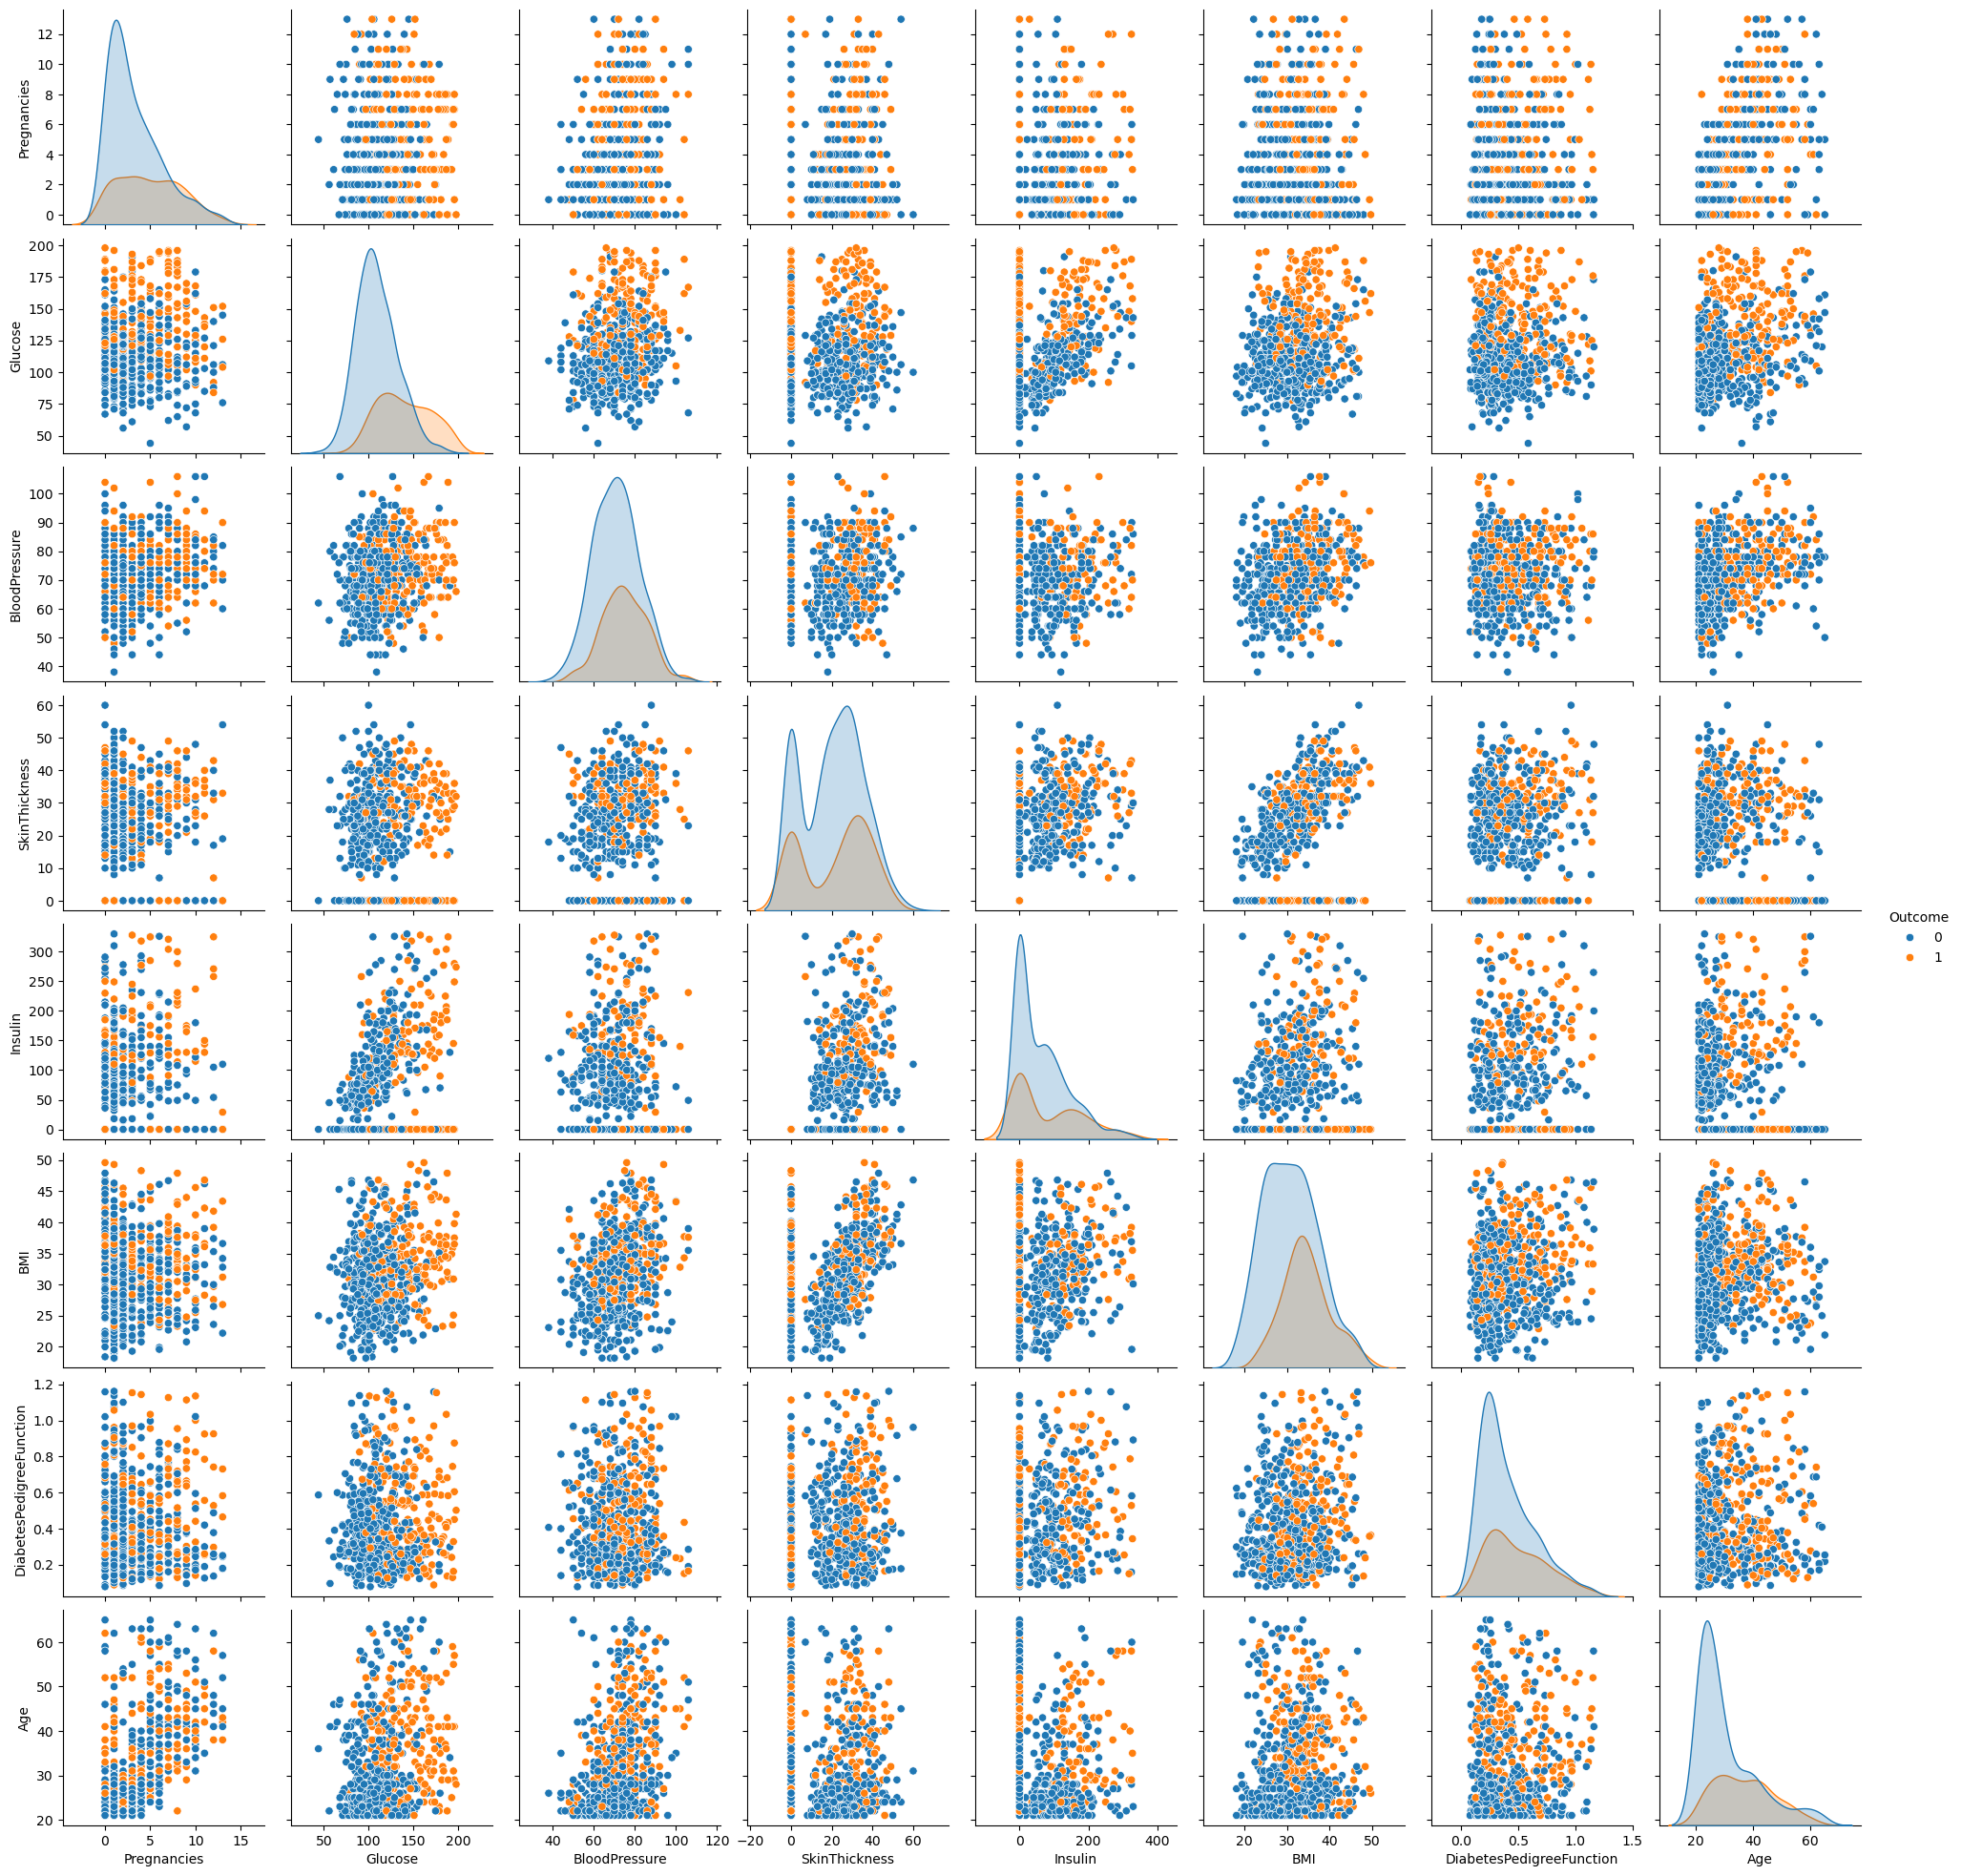

In [17]:
plt.figure(figsize=(15,15))
sns.pairplot(diabetes_data, hue='Outcome')
plt.show()

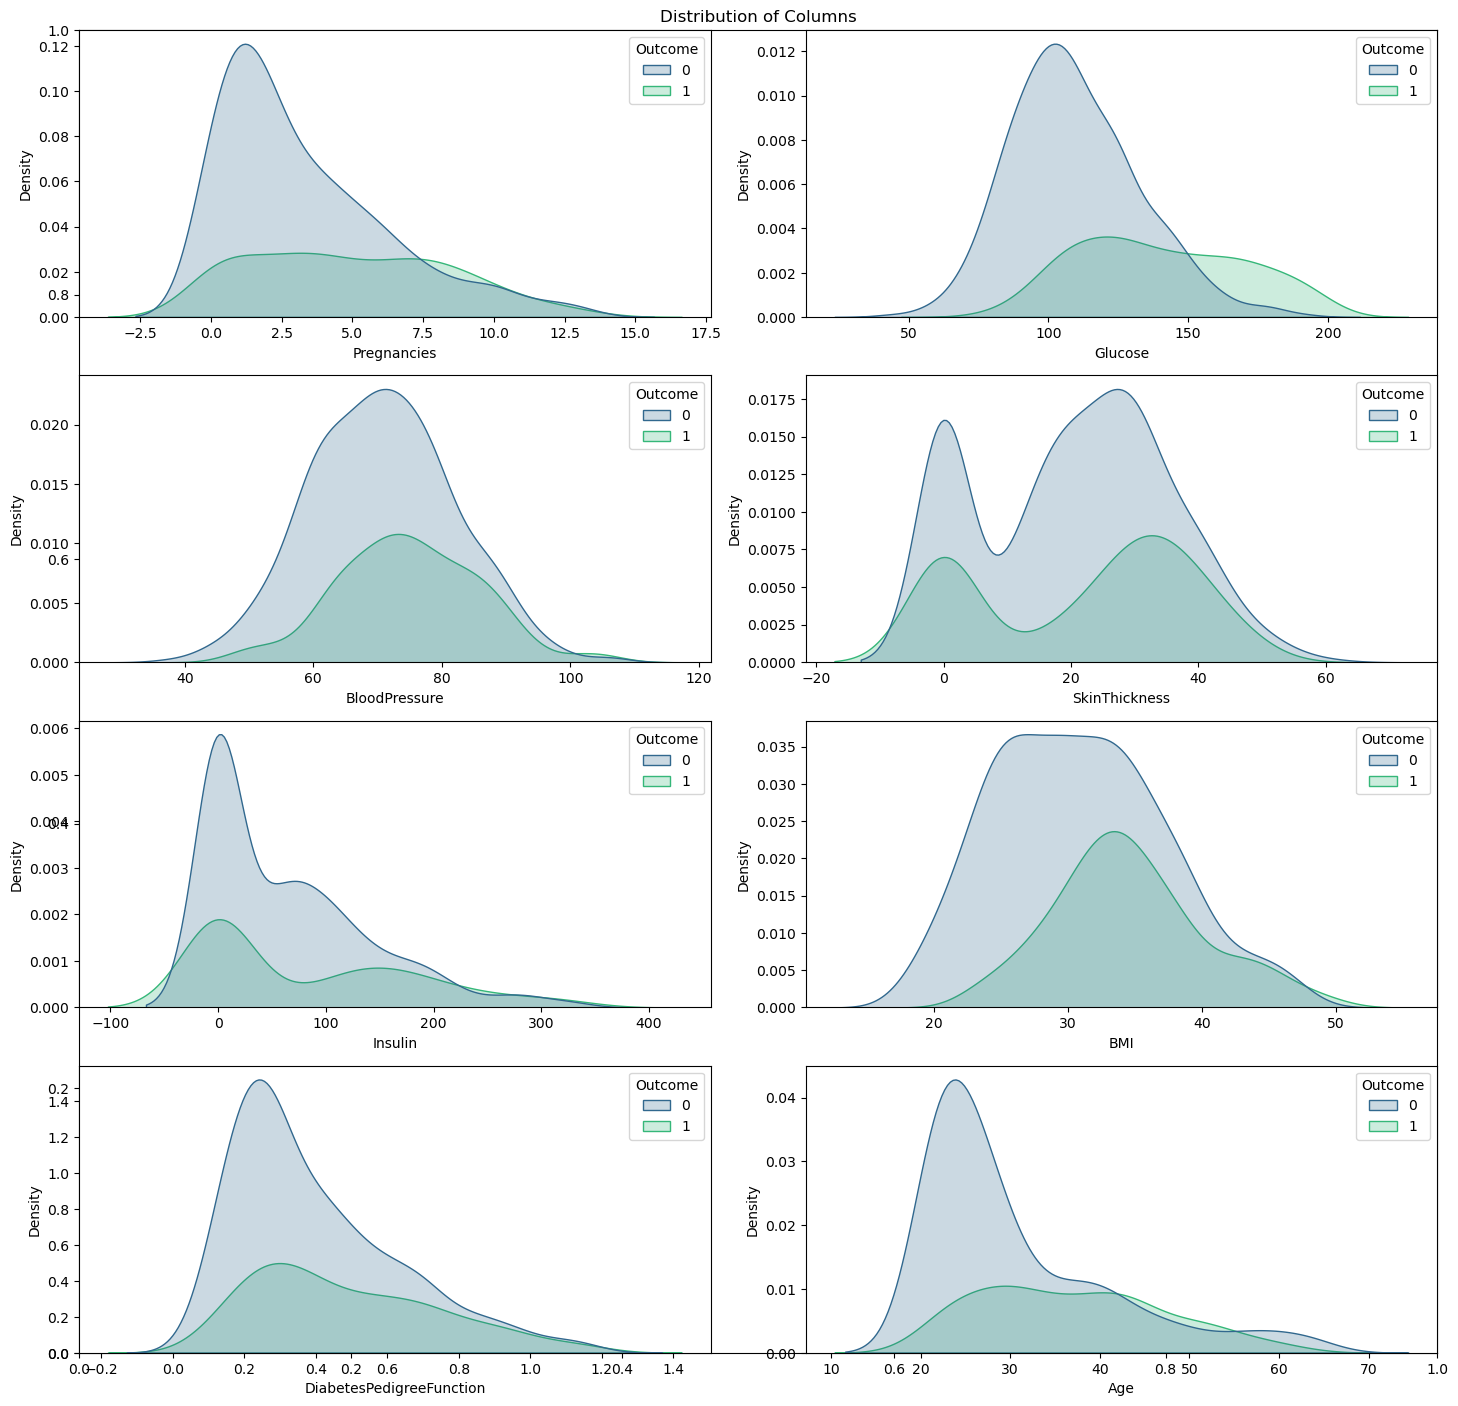

In [18]:
#loop over
plt.figure(figsize=(15,15))
plt.title('Distribution of Columns')
for i,col in zip(range(1, len(diabetes_data.columns)), diabetes_data.columns):
    plt.subplot(4,2,i)
    sns.kdeplot(data=diabetes_data, x=col, hue='Outcome', fill=True, palette="viridis")
    plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


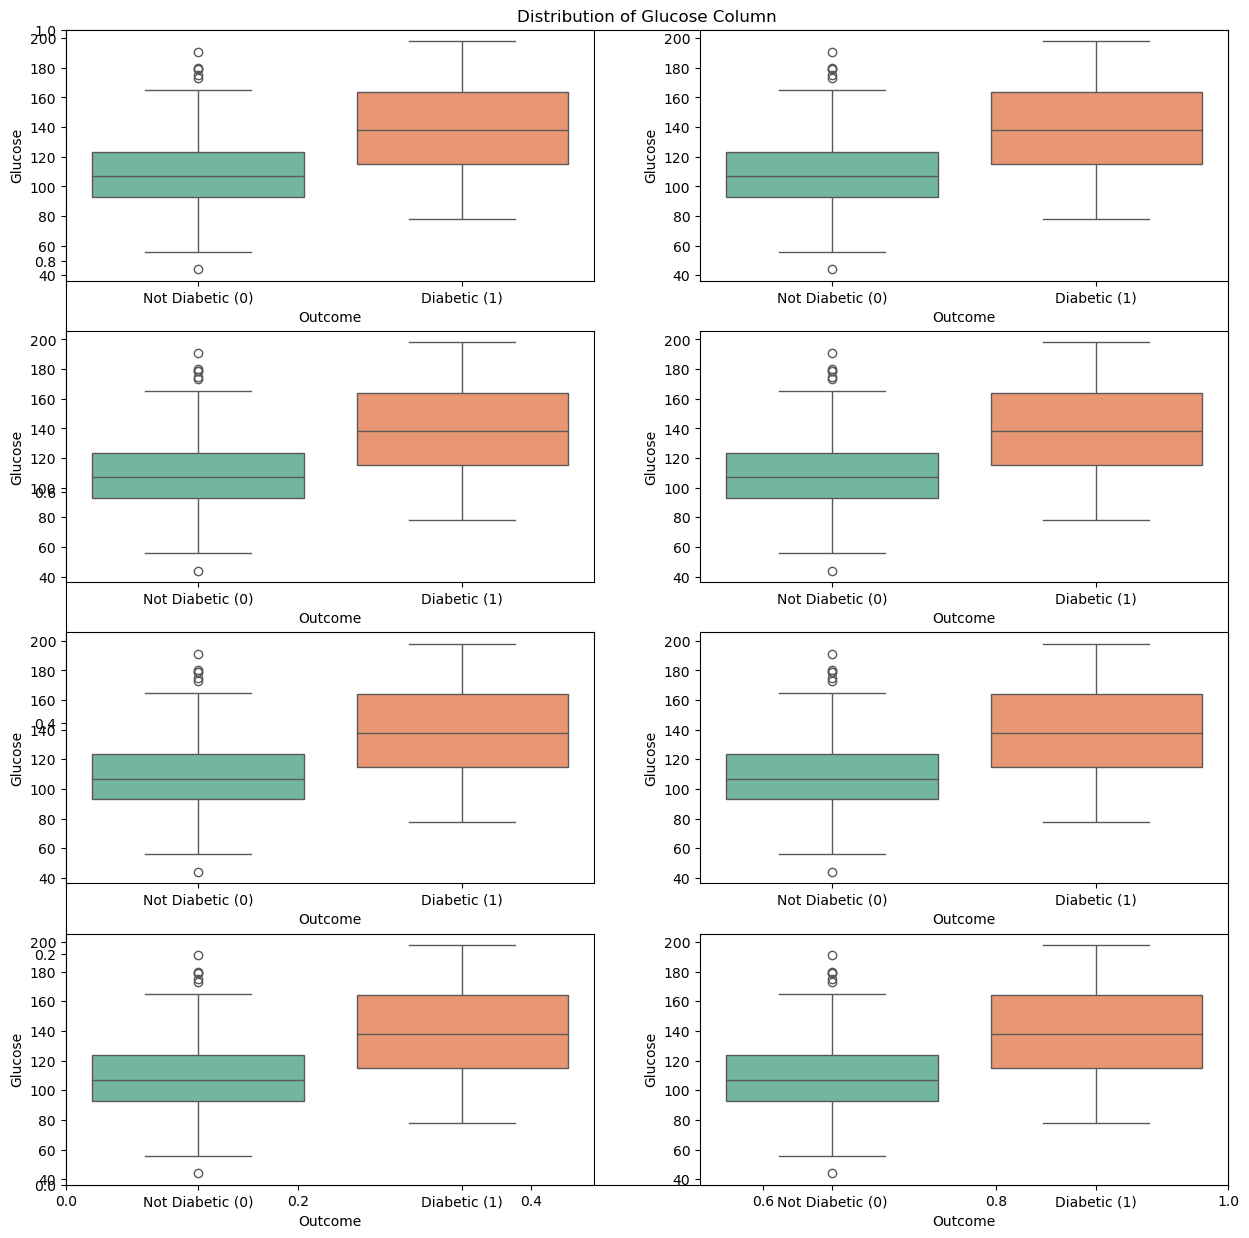

In [ ]:
# loop over Glucose column to show its distribution based on target  ( 1 or 0 )
plt.figure(figsize=(15,15))
plt.title('Distribution of Glucose Column')
for i,col in zip(range(1,len(diabetes_data.columns)),diabetes_data.columns) : 
    plt.subplot(4,2,i)
    sns.boxplot(x=diabetes_data["Outcome"], y=diabetes_data["Glucose"], palette="Set2")
    plt.xticks([0, 1], ['Not Diabetic (0)', 'Diabetic (1)'])
plt.show() 

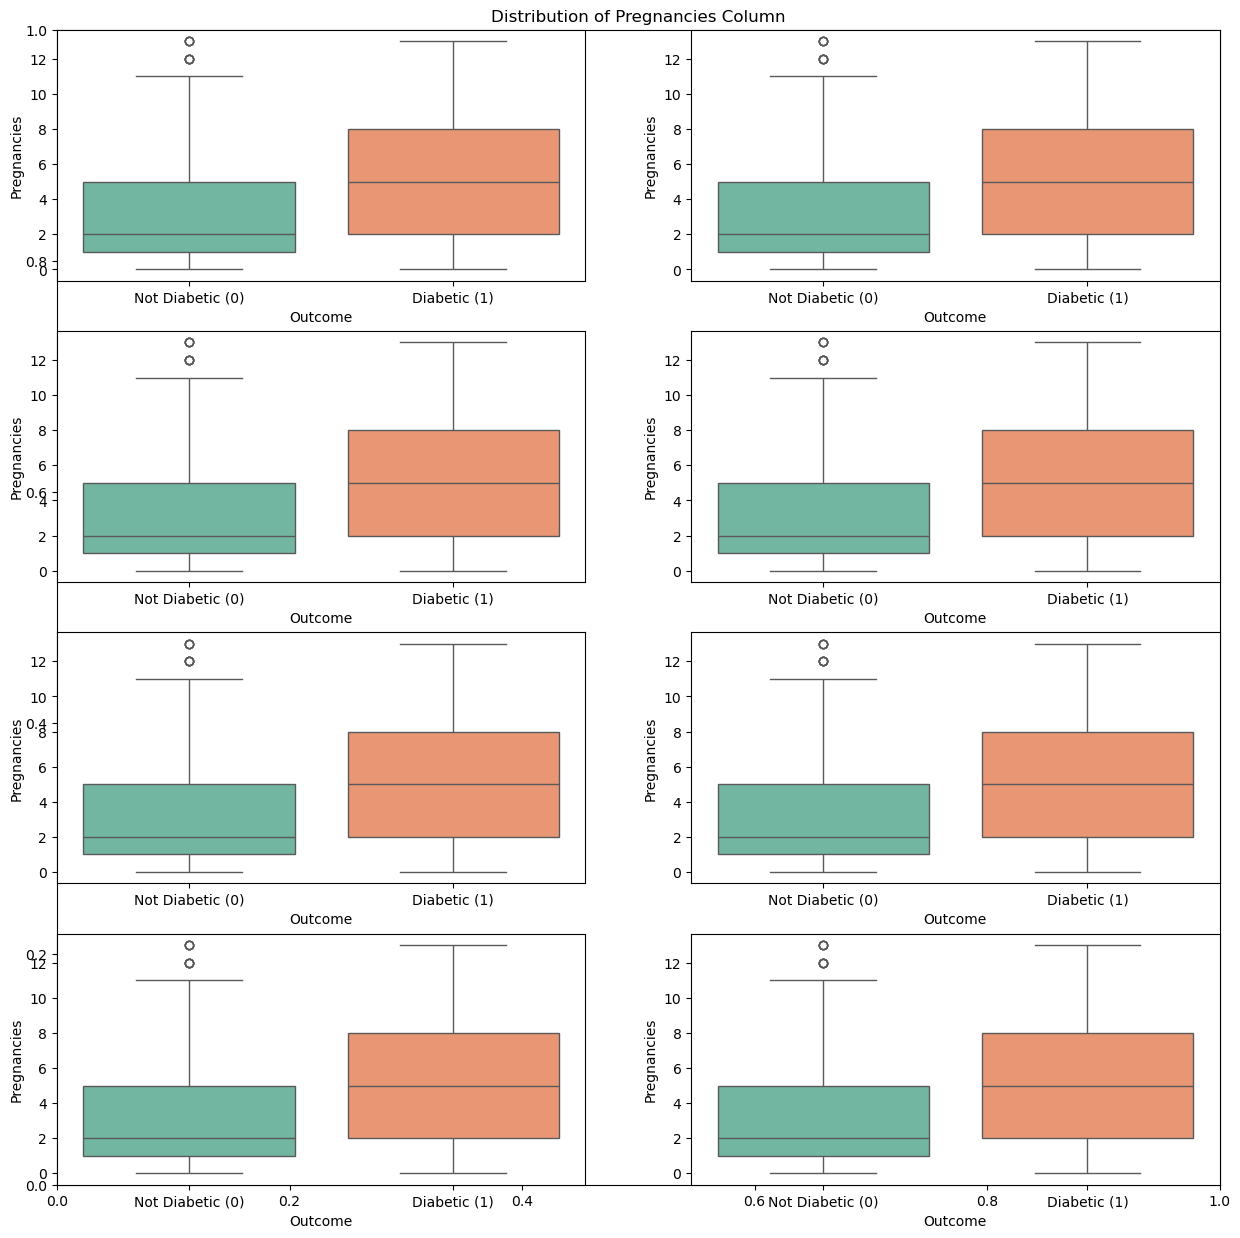

In [20]:
# loop over Pregnancies column to show its distribution based on target  ( 1 or 0 )
plt.figure(figsize=(15,15))
plt.title('Distribution of Pregnancies Column')
for i,col in zip(range(1,len(diabetes_data.columns)),diabetes_data.columns) : 
    plt.subplot(4,2,i)
    sns.boxplot(x=diabetes_data["Outcome"], y=diabetes_data["Pregnancies"], palette="Set2")
    plt.xticks([0, 1], ['Not Diabetic (0)', 'Diabetic (1)'])
plt.show() 

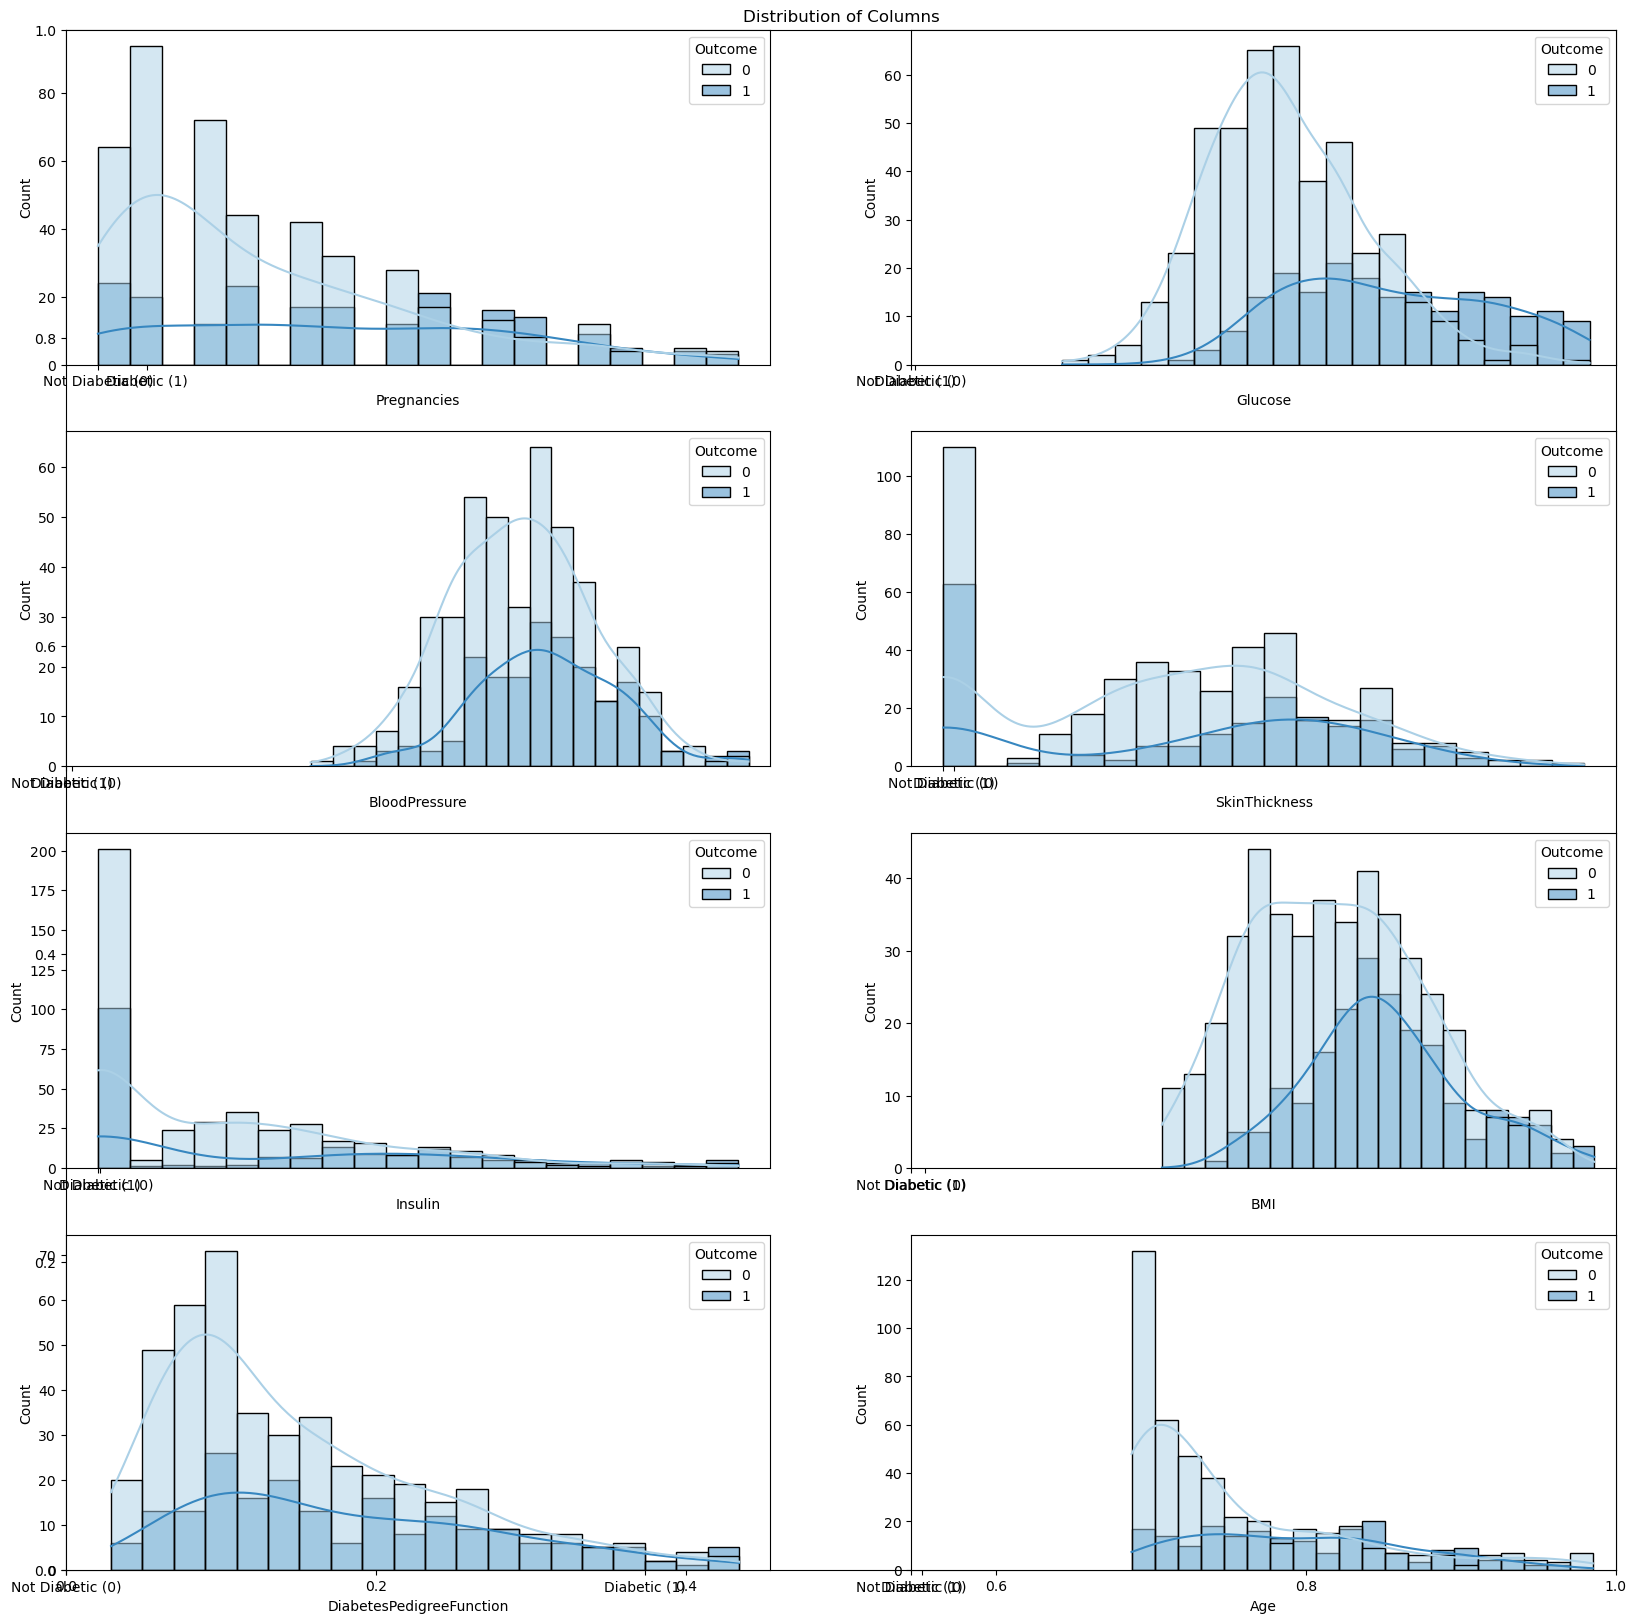

In [21]:
# loop over columns to show its distribution based on target  ( 1 or 0 )
plt.figure(figsize=(20,20))
plt.title('Distribution of Columns')
for i,col in zip(range(1,len(diabetes_data.columns)),diabetes_data.columns) : 
    plt.subplot(4,2,i)
    sns.histplot(data=diabetes_data, x=col, hue="Outcome", bins=20, kde=True, palette="Blues")
    plt.xticks([0, 1], ['Not Diabetic (0)', 'Diabetic (1)'])
plt.show() 

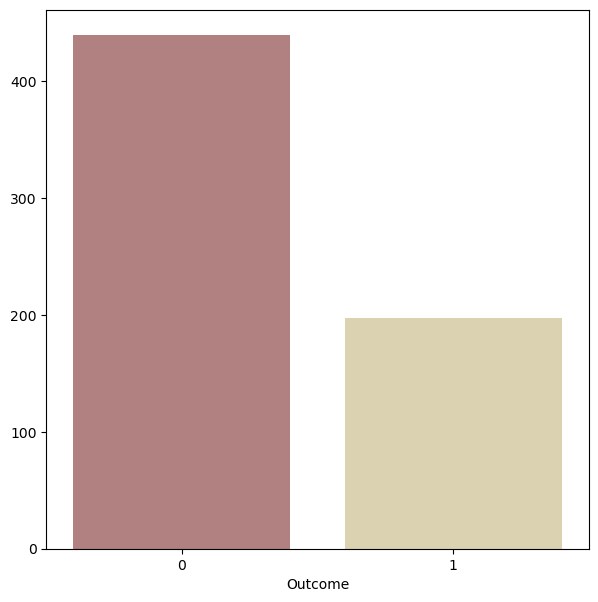

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(x=diabetes_data.Outcome.value_counts().index , y=diabetes_data.Outcome.value_counts().values , palette='pink')
plt.show()

In [28]:
#Splitting the data

X = diabetes_data.drop(columns=['Outcome'], axis=1)
Y = diabetes_data.Outcome

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [26]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()

In [31]:
xtrainScaled = scaler.fit_transform(xtrain)
xtestScaled = scaler.transform(xtest)

In [32]:
xtrainScaled = pd.DataFrame(xtrainScaled, columns=xtrain.columns[:8])

In [33]:
#Modeling with unbalanced data
#Logistic Regression

LogisticRegressionModedl = LogisticRegression(max_iter=3000)
LogisticRegressionModedl.fit(xtrainScaled, ytrain)

LogisticRegression(max_iter=3000)

In [34]:
ypredForLogistic = LogisticRegressionModedl.predict(xtestScaled)

In [35]:
print("Test Accuracy Score: ", accuracy_score(ytest, ypredForLogistic))

Test Accuracy Score:  0.7265625


In [36]:
print(classification_report(ytest, ypredForLogistic))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        92
           1       0.52      0.36      0.43        36

    accuracy                           0.73       128
   macro avg       0.65      0.62      0.62       128
weighted avg       0.70      0.73      0.71       128



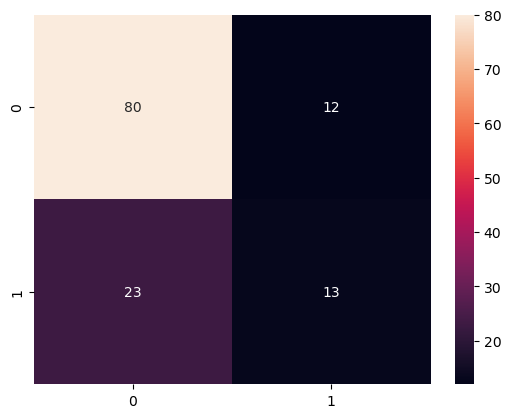

In [37]:
sns.heatmap(confusion_matrix(ytest,ypredForLogistic),annot=True)
plt.show()

Random Forest  

In [38]:

RandomForestClassifierModel = RandomForestClassifier(class_weight='balanced')

In [39]:
RandomForestClassifierModel.fit(xtrainScaled, ytrain)

RandomForestClassifier(class_weight='balanced')

In [40]:
ypredForRandomForest = RandomForestClassifierModel.predict(xtestScaled)

In [41]:
print('Test Accuracy Score: ', accuracy_score(ytest, ypredForRandomForest))

Test Accuracy Score:  0.734375


In [42]:
print(classification_report(ytest, ypredForRandomForest))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        92
           1       0.53      0.50      0.51        36

    accuracy                           0.73       128
   macro avg       0.67      0.66      0.67       128
weighted avg       0.73      0.73      0.73       128



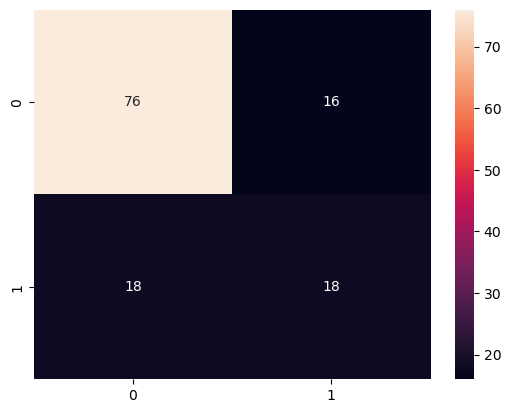

In [43]:
sns.heatmap(confusion_matrix(ytest,ypredForRandomForest),annot=True)
plt.show()

Decision Tree   

In [44]:
DecisionTreeClassifierModel = DecisionTreeClassifier(class_weight='balanced')


In [45]:
DecisionTreeClassifierModel.fit(xtrainScaled, ytrain)

DecisionTreeClassifier(class_weight='balanced')

In [46]:
ypredForDecisionTree = DecisionTreeClassifierModel.predict(xtestScaled)

In [47]:
print('Test Accuracy Score: ', accuracy_score(ytest, ypredForDecisionTree))

Test Accuracy Score:  0.7109375


In [48]:
print(classification_report(ytest,ypredForDecisionTree))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        92
           1       0.49      0.61      0.54        36

    accuracy                           0.71       128
   macro avg       0.66      0.68      0.67       128
weighted avg       0.74      0.71      0.72       128



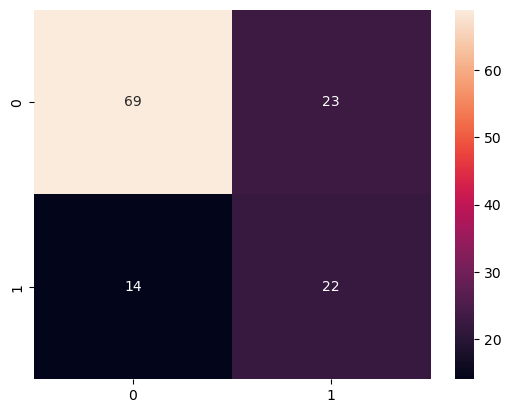

In [49]:
sns.heatmap(confusion_matrix(ytest,ypredForDecisionTree),annot=True)
plt.show()

SVM

In [50]:
SVMClassifierModel = SVC(class_weight="balanced")

In [51]:
SVMClassifierModel.fit(xtrainScaled, ytrain)

SVC(class_weight='balanced')

In [52]:
ypredForSVC = SVMClassifierModel.predict(xtestScaled)

In [53]:
print("Test Accuracy Score: ", accuracy_score(ytest, ypredForSVC))

Test Accuracy Score:  0.7109375


In [54]:
print(classification_report(ytest,ypredForSVC))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78        92
           1       0.49      0.67      0.56        36

    accuracy                           0.71       128
   macro avg       0.67      0.70      0.67       128
weighted avg       0.75      0.71      0.72       128



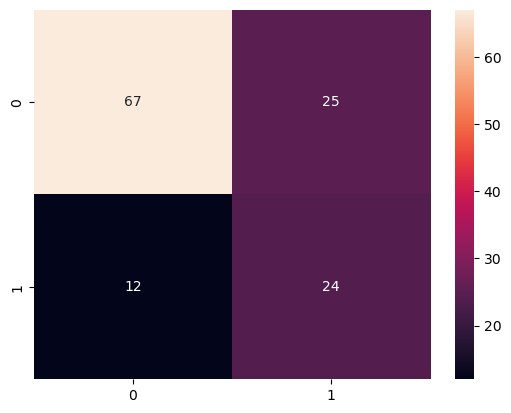

In [55]:
sns.heatmap(confusion_matrix(ytest,ypredForSVC),annot=True)
plt.show()

XGBoost

In [58]:
XGBoostClassifierModel = XGBClassifier()

In [59]:
XGBoostClassifierModel.fit(xtrainScaled, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [60]:
ypredForXGBoost = XGBoostClassifierModel.predict(xtestScaled)

In [62]:
print("Test Accuracy Score : ", accuracy_score(ytest,ypredForXGBoost))

Test Accuracy Score :  0.7265625


In [64]:
print(classification_report(ytest,ypredForXGBoost))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        92
           1       0.51      0.56      0.53        36

    accuracy                           0.73       128
   macro avg       0.67      0.67      0.67       128
weighted avg       0.73      0.73      0.73       128



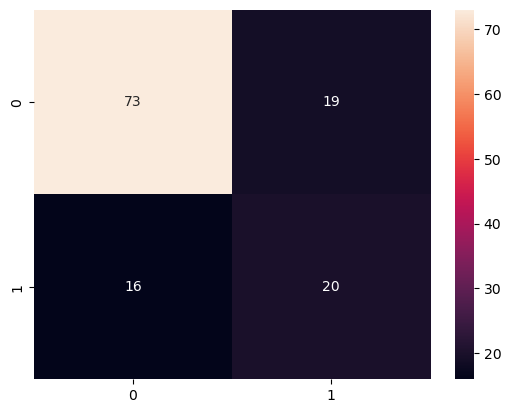

In [65]:
sns.heatmap(confusion_matrix(ytest,ypredForXGBoost),annot=True)
plt.show()

Modeling with Balanced Data

In [66]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [67]:
X_train_resampled, y_train_resampled = smote.fit_resample(xtrainScaled, ytrain)

Logistic Regression

In [68]:
BLogisticRegressionModel = LogisticRegression(max_iter=3000)

In [69]:
BLogisticRegressionModel.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=3000)

In [71]:
BypredForLogistic = BLogisticRegressionModel.predict(xtestScaled)

In [72]:
print("Test Accuracy Score : ", accuracy_score(ytest,BypredForLogistic))

Test Accuracy Score :  0.7109375


In [73]:
BRandomForestClassifierModel = RandomForestClassifier()
BRandomForestClassifierModel.fit(X_train_resampled,y_train_resampled)
BypredForRandomForest = BRandomForestClassifierModel.predict(xtestScaled)
print("Test Accuracy Score : ", accuracy_score(ytest,BypredForRandomForest))


Test Accuracy Score :  0.7578125


In [74]:
BDecisionTreeClassifierModel = DecisionTreeClassifier()
BDecisionTreeClassifierModel.fit(X_train_resampled,y_train_resampled)
BypredForDecisionTree = BDecisionTreeClassifierModel.predict(xtestScaled)
print("Test Accuracy Score : ", accuracy_score(ytest,BypredForDecisionTree))

Test Accuracy Score :  0.671875


In [75]:
BSVMClassifierModel = SVC()
BSVMClassifierModel.fit(X_train_resampled,y_train_resampled)
BypredForSVC = BSVMClassifierModel.predict(xtestScaled)
print("Test Accuracy Score : ", accuracy_score(ytest,BypredForSVC))

Test Accuracy Score :  0.7265625


In [76]:
BXGBoostClassifierModel = XGBClassifier()
BXGBoostClassifierModel.fit(X_train_resampled,y_train_resampled)
BypredForXGBoost = BXGBoostClassifierModel.predict(xtestScaled)
print("Test Accuracy Score : ", accuracy_score(ytest,BypredForXGBoost))


Test Accuracy Score :  0.703125


In [77]:
unBalancedModels_Accs = {
    'Logistic':accuracy_score(ytest,ypredForLogistic), 
    'RandomForest':accuracy_score(ytest,ypredForRandomForest),
    'DescionTree':accuracy_score(ytest,ypredForSVC),
    'SVM':accuracy_score(ytest,ypredForSVC),
    'XGBoost':accuracy_score(ytest,ypredForXGBoost),
}
unBalancedModels_Accs = pd.DataFrame(unBalancedModels_Accs.items(), columns=['Model', 'Accuracy'])

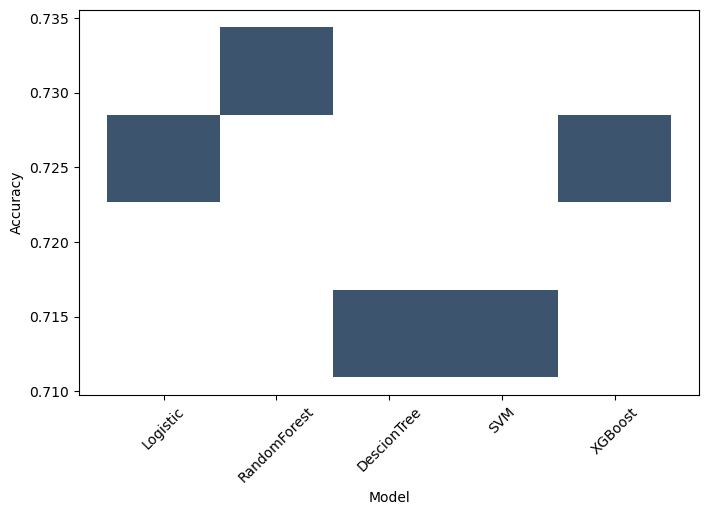

In [78]:
plt.figure(figsize=(8,5))
sns.histplot(x='Model', y='Accuracy', data=unBalancedModels_Accs, palette="viridis")
plt.xticks(rotation=45) 
plt.show()

In [79]:
BalancedModels_Accs = {
    'Logistic':accuracy_score(ytest,BypredForLogistic), 
    'RandomForest':accuracy_score(ytest,BypredForRandomForest),
    'DescionTree':accuracy_score(ytest,BypredForSVC),
    'SVM':accuracy_score(ytest,BypredForSVC),
    'XGBoost':accuracy_score(ytest,BypredForXGBoost),
}
BalancedModels_Accs = pd.DataFrame(BalancedModels_Accs.items(), columns=['Model', 'Accuracy'])

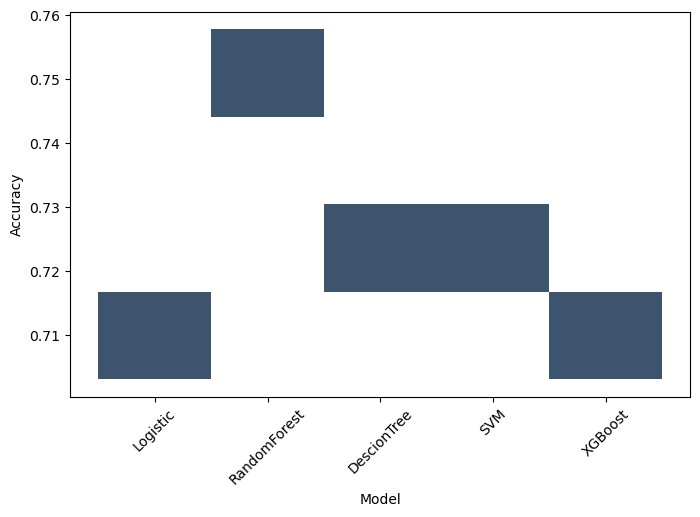

In [80]:
plt.figure(figsize=(8,5))
sns.histplot(x='Model', y='Accuracy', data=BalancedModels_Accs, palette="viridis")
plt.xticks(rotation=45) 
plt.show()